# **Задание 1**

### **Описание задачи с точки зрения NLP**

Задача распознавания именованных сущностей (Named Entity Recognition, NER) заключается в выделении из текста слов, относящихся к именованным сущностям, и присвоении им правильного класса из заранее определённого набора. В данном задании рассматриваются следующие классы:
*   **PER** - персона
*   **ORG** - организация
*   **LOC** - локация
*   **EVT** - событие
*   **PRO** - продукт

Например, слово "Twitter" является именованной сущностью, но ему могут быть присвоены разные классы в зависимости от контекста:

*   `“Twitter announced revenues for 2018 ...”` - здесь **Twitter** это **ORG**, так как речь идет об организации.
*   `“I posted it on Twitter”` - здесь речь идёт о **Twitter** как о продукте, поэтому класс **PRO**.

### **Классические методы решения**

*   **Rule-based:**
    *   Этот метод основан на правилах, составленных лингвистами. Например, если в тексте встречаются два слова подряд, начинающиеся с большой буквы, и одно из них есть в списке фамилий, то это именованная сущность, обозначающая персону (`PER`).

*   **CRF (Conditional Random Fields):**
    *   Этот алгоритм строит вероятностную модель для разметки последовательностей слов (токенов) в предложении.
    *   Обычно используется разметка BIO:
        *   **B** - begin (начало сущности)
        *   **I** - inside (внутри сущности)
        *   **O** - outside (вне сущности)
    *   Например, фраза "Александр Сергеевич Пушкин на дуэли" будет размечена (по словам) как: `B-PER`, `I-PER`, `I-PER`, `O`, `O`.
    *   Ответом модели для последовательности слов является наиболее вероятная последовательность тегов. Вероятности вычисляются на больших корпусах размеченных текстов.

### **Решение через LLM (Large Language Models)**

После предварительного обучения (pre-training) LLM уже представляет собой вероятностную модель, которая обладает знаниями об именованных сущностях и контекстах их употребления.

*   **Zero-shot или Few-shot промптинг:**
    *   Это самый простой вариант, где можно сформулировать задачу для модели в виде промпта:
    ```
    Твоя задача - распознать именованные сущности в тексте и классифицировать их на PER, ORG, LOC, EVT, PRO: <text>
    ```

*   **Fine-tuning (дообучение):**
    *   Этот метод применяется, если есть достаточное количество данных с BIO-разметкой и качество, получаемое с помощью промптов, неудовлетворительно.
    *   Задача сводится к классификации для каждого токена в предложении.
    *   После получения предсказанных тегов от модели, токены объединяются в именованные сущности.

### **Оценка качества модели**

Качество модели оценивается с помощью стандартных метрик классификации: **precision**, **recall** и **f1-score**.

*   **True Positive (TP):** Случаи, когда правильно определена и сама именованная сущность, и ее класс (`PRO`, `ORG` и т.д.).
*   **False Negative (FN):** Модель не определила именованную сущность или присвоила ей неверный класс.
*   **False Positive (FP):** Модель определила обычное слово как именованную сущность.

Также полезно анализировать метрики в разрезе каждого класса именованных сущностей, чтобы выявить, с какими именно классами у модели возникают проблемы.

#Задание 2
Реализуйте чтение датасета в pandas DataFrame с обязательными колонками
"document_id", "document_text", "entity", "gold_answer". Выведите шапку датафрейма.

In [1]:
!gdown https://bsnlp.cs.helsinki.fi/bsnlp-2019/sample_pl_cs_ru_bg.zip

Downloading...
From: https://bsnlp.cs.helsinki.fi/bsnlp-2019/sample_pl_cs_ru_bg.zip
To: /content/sample_pl_cs_ru_bg.zip
100% 137k/137k [00:00<00:00, 410kB/s]


In [2]:

!unzip sample_pl_cs_ru_bg.zip

Archive:  sample_pl_cs_ru_bg.zip
   creating: sample_pl_cs_ru_bg/
   creating: sample_pl_cs_ru_bg/annotated/
   creating: sample_pl_cs_ru_bg/annotated/bg/
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_1.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_11.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_13.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_14.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_15.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_16.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_17.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_19.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_2.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_21.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg/brexit_bg.txt_file_22.out  
  inflating: sample_pl_cs_ru_bg/annotated/bg

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [4]:
''''''

df = pd.DataFrame()
for cur_dir, _, file_names in os.walk('/content/sample_pl_cs_ru_bg/annotated/ru'):
    for file_name in file_names:
        if file_name.endswith('.out'):
            file_path = os.path.join(cur_dir, file_name)
            with open(file_path, 'r') as f:
                lines = f.readlines()

            raw_file_path = file_path.replace('annotated', 'raw').replace('out', "txt")
            with open(raw_file_path) as text_file:
                text = text_file.readlines()[4:]

            document_id = lines[0][:-1]
            for line in lines[1:]:
                i = len(df)
                df.loc[i, 'document_id'] = document_id
                df.loc[i, 'document_text'] = '\n'.join(text)
                # assert len(line.split('\t')) == 4
                in_text, gold_answer, entity, ner_id = line.split('\t')
                df.loc[i, 'in_text'] = in_text
                df.loc[i, "entity"] = entity
                df.loc[i, "gold_answer"] = gold_answer
                df.loc[i, "ner_id"] = ner_id
df.head()


,document_id,document_text,in_text,entity,gold_answer,ner_id
0,ru-1006,Захарова лирически прокомментировала отставку ...,Brexit,EVT,Brexit,EVT-Brexit\n
1,ru-1006,Захарова лирически прокомментировала отставку ...,Facebook,PRO,Facebook,PRO-Facebook\n
2,ru-1006,Захарова лирически прокомментировала отставку ...,Борис Джонсон,PER,Борис Джонсон,PER-Boris-Johnson\n
3,ru-1006,Захарова лирически прокомментировала отставку ...,Бориса Джонсона,PER,Борис Джонсон,PER-Boris-Johnson\n
4,ru-1006,Захарова лирически прокомментировала отставку ...,Британии,LOC,Британия,GPE-Great-Britain\n


#Задание 3
Напишите функцию, которая принимает на вход строку датафрейма и выдает текст
входного сообщения для LLM

In [5]:
''''''

# Шаблон промпта для использования в коде Python

# Текст, который необходимо проанализировать, будет вставлен в эту переменную
text_to_analyze = """
(сюда вставляется текст для анализа)
"""

# Сам промпт

def create_prompt(row: pd.Series) -> str:
    text_to_analyze = row["document_text"]
    ner_prompt_template = """
    Ты — высокоточная экспертная система для распознавания именованных сущностей (Named Entity Recognition, NER). Твоя задача — внимательно проанализировать предоставленный текст и извлечь из него все именованные сущности в соответствии со строгими правилами, описанными ниже.

    **# 1. Целевые сущности для извлечения:**

    *   **PER**: Персона (имена людей, семьи, вымышленные персонажи).
    *   **ORG**: Организация (компании, учреждения, партии, команды, музыкальные группы).
    *   **LOC**: Локация (географические объекты и рукотворные сооружения: города, страны, стадионы, улицы, аэропорты).
    *   **EVT**: Событие (конференции, войны, фестивали, катастрофы, праздники).
    *   **PRO**: Продукт (товары, услуги, законы, договоры, названия книг, фильмов, ПО).

    **# 2. Общие правила:**

    1.  **Уникальность и регистр**: Все упоминания одной и той же сущности (включая разные падежи, сокращения и регистр, например, "ООН", "оон", "Организации Объединенных Наций") должны быть представлены одной записью в результате.
    2.  **Максимальная длина**: Всегда извлекай самую длинную, наиболее полную сущность. Если одна сущность вложена в другую (например, "George Washington" в "George Washington University"), извлекай только внешнюю, более крупную сущность ("George Washington University" как ORG).
    3.  **Координация**: В координированных фразах, таких как "Европейский и Британский парламенты", извлекай обе сущности отдельно ("Европейский" как ORG и "Британский парламент" как ORG).
    4.  **Исключения**: НЕ извлекай следующие типы данных:
        *   Номинальные или местоименные упоминания (например, "президент", "он", "компания").
        *   Временные и числовые выражения (даты, валюты, измерения).
        *   Идентификаторы (email, URL, почтовые адреса).
        *   Группы людей без формальной организации (например, "мусульмане", "программисты").
    5.  **Разрешение неоднозначности по контексту**:
        *   Используй контекст для определения типа сущности. Пример: "Twitter [ORG] объявил о доходах", но "я опубликовал это в Twitter [PRO]".
        *   Если контекста недостаточно, используй следующие правила для выбора наиболее вероятного типа:
            *   `ORG` или `PER` -> выбери `PER`.
            *   `ORG` или `PRO` -> выбери `ORG`.

    **# 3. Детальные правила для каждой сущности:**

    *   **PER (Персона):**
        *   **Включай**: Имена, фамилии, псевдонимы, семьи ("семья Ивановых"), вымышленных персонажей ("Джеймс Бонд"), группы людей, связанные с организацией ("спартанцы" -> AC Sparta Praha), и группы людей, связанные с геополитическими объектами ("россияне").
        *   **Не включай**: Титулы, звания и должности ("президент", "доктор", "генеральный директор"). Из "CEO Доктор Ян Ковальский" нужно извлечь только "Ян Ковальский".
        *   **Притяжательные формы**: Распознавай притяжательные формы, но в лемме указывай базовую форму имени ("пушкинские стихи" -> лемма "Пушкин").

    *   **LOC (Локация):**
        *   **Включай**: Географические названия (города, страны, реки) и рукотворные сооружения (стадионы, аэропорты, улицы, музеи, церкви). Например, "аэропорт Шереметьево".
        *   **Полное название**: Включай в состав сущности упоминания типа объекта и его местоположения. Пример: "Церковь Святого Стефана в Стамбуле" целиком является одной LOC-сущностью.
        *   **Геополитические объекты**: Страны и города всегда помечаются как LOC, даже если они означают правительство, нацию или спортивную команду ("Россия победила в матче").

    *   **ORG (Организация):**
        *   **Включай**: Компании, государственные учреждения, политические партии, спортивные команды, образовательные учреждения, музыкальные группы.
        *   **Полное название**: Включай в состав сущности слова-указатели (например, "банк") и местоположение. Пример: "Банк Citi Handlowy в Познани" целиком является одной ORG-сущностью.

    *   **EVT (Событие):**
        *   **Включай**: Конференции, фестивали, войны, катастрофы, праздники, спортивные мероприятия. Также включай будущие, гипотетические или вымышленные события ("Полексит").
        *   **Полное название**: Включай в состав сущности год и местоположение. Пример: "Зимние Олимпийские игры 2004 года в Канаде" целиком является одной EVT-сущностью.
        *   **Конфликт с LOC**: Если название события также является названием локации (например, "битва при Ватерлоо"), и в тексте речь идет о месте ("он погиб при Ватерлоо"), то сущность помечается как `LOC`.

    *   **PRO (Продукт):**
        *   **Включай**: Названия товаров (электроника, автомобили), веб-сервисов, программного обеспечения, книг, фильмов, телепрограмм, газет, а также официальных документов, договоров и программ ("Лиссабонский договор", "Горизонт 2020").

    **# 4. Формат вывода:**

    Предоставь результат ИСКЛЮЧИТЕЛЬНО в формате JSON. Это должен быть список JSON-объектов. Каждый объект представляет одну уникальную сущность и должен содержать три поля:
    *   `text`: точная текстовая форма сущности, извлеченная из текста. Только слово или слова, из которых состоит сущность, без контекста.
    *   `lemma`: нормальная (словарная, именительный падеж, единственное число для людей/объектов) форма сущности.
    *   `type`: один из пяти типов: `PER`, `ORG`, `LOC`, `EVT`, `PRO`.

    **Пример формата вывода:**
    ```json
    [
    {{
        "text": "Theresa May",
        "lemma": "Тереза Мэй",
        "type": "PER"
    }},
    {{
        "text": "European Union",
        "lemma": "Европейский Союз",
        "type": "ORG"
    }},
    {{
        "text": "2004 Winter Olympics in Canada",
        "lemma": "Зимние Олимпийские игры 2004 года в Канаде",
        "type": "EVT"
    }}
    ]
    # 5. Текст для анализа:
    Проанализируй следующий текст:
    {text_to_analyze}
    Результат (только JSON):
    """
    return ner_prompt_template.format(text_to_analyze=text_to_analyze)



In [6]:
!mkdir -p prompts

In [7]:
for doc_id in df["document_id"].unique():
    with open(f'prompts/{doc_id}_prompt.txt', 'w') as f:
        row = df[df["document_id"] == doc_id].iloc[0]
        f.write(create_prompt(row))

#Задание 4
Получите ответы GigaChat для всех документов. Документов всего 9, поэтому сделать это
можно вручную, пользуясь веб-интерфейсом GigaChat или ботом в ВК или Телеграме. Не
очищайте историю сообщений, чтобы потом продемонстрировать подлинность ответов на
онлайн-собеседовании.
Внесите ответы GigaChat в датафрейм, сохраните его.

In [8]:
""""""

import json
ru_1000 = json.loads('''[
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "министр иностранных дел Великобритании",
        "lemma": "Министерство иностранных дел Великобритании",
        "type": "ORG"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "Дэвид Дэвис",
        "lemma": "Дэвид Дэвис",
        "type": "PER"
    },
    {
        "text": "Стив Бейкер",
        "lemma": "Стив Бейкер",
        "type": "PER"
    },
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "ЕС",
        "lemma": "Европейский Союз",
        "type": "ORG"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    },
    {
        "text": "МИД Соединенного Королевства",
        "lemma": "Министерство иностранных дел Соединенного Королевства",
        "type": "ORG"
    },
    {
        "text": "британский парламент",
        "lemma": "Британский парламент",
        "type": "ORG"
    },
    {
        "text": "Подробности.ua",
        "lemma": "Подробности.ua",
        "type": "PRO"
    },
    {
        "text": "The Guardian",
        "lemma": "The Guardian",
        "type": "PRO"
    },
    {
        "text": "УНН",
        "lemma": "УНН",
        "type": "PRO"
    },
    {
        "text": "Лондон",
        "lemma": "Лондон",
        "type": "LOC"
    }
]''')
ru_1001 = json.loads('''[
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "Министерство иностранных дел Великобритании",
        "lemma": "Министерство иностранных дел Великобритании",
        "type": "ORG"
    },
    {
        "text": "Associated Press",
        "lemma": "Associated Press",
        "type": "ORG"
    },
    {
        "text": "канцелярия премьера",
        "lemma": "канцелярия премьера",
        "type": "ORG"
    },
    {
        "text": "Соединенное Королевство",
        "lemma": "Соединенное Королевство",
        "type": "LOC"
    },
    {
        "text": "Европейский союз",
        "lemma": "Европейский союз",
        "type": "ORG"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    }
]''')
ru_1002 = json.loads('''[
    {
        "text": "Тереза Мей",
        "lemma": "Тереза Мей",
        "type": "PER"
    },
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "ЕС",
        "lemma": "Европейский Союз",
        "type": "ORG"
    },
    {
        "text": "Дэвид Дэвис",
        "lemma": "Дэвид Дэвис",
        "type": "PER"
    },
    {
        "text": "Брекзит",
        "lemma": "Брекзит",
        "type": "EVT"
    }
]''')
ru_1003 = json.loads('''[
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "Даунинг-стрит",
        "lemma": "Даунинг-стрит",
        "type": "LOC"
    },
    {
        "text": "Дэвид Дэвис",
        "lemma": "Дэвид Дэвис",
        "type": "PER"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    }
]''')
ru_1004 = json.loads('''[
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "МИД Великобритании",
        "lemma": "Министерство иностранных дел Великобритании",
        "type": "ORG"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "ТАСС",
        "lemma": "ТАСС",
        "type": "ORG"
    },
    {
        "text": "канцелярия премьер-министра",
        "lemma": "канцелярия премьер-министра",
        "type": "ORG"
    },
    {
        "text": "министр по вопросам Brexit",
        "lemma": "министр по вопросам Brexit",
        "type": "ORG"
    },
    {
        "text": "Дэвид Дэвис",
        "lemma": "Дэвид Дэвис",
        "type": "PER"
    },
    {
        "text": "ЕС",
        "lemma": "Европейский союз",
        "type": "ORG"
    },
    {
        "text": "Германия",
        "lemma": "Германия",
        "type": "LOC"
    },
    {
        "text": "Польша",
        "lemma": "Польша",
        "type": "LOC"
    },
    {
        "text": "Лондон",
        "lemma": "Лондон",
        "type": "LOC"
    },
    {
        "text": "саммит по развитию региона Западных Балкан",
        "lemma": "саммит по развитию региона Западных Балкан",
        "type": "EVT"
    },
    {
        "text": "регион Западных Балкан",
        "lemma": "регион Западных Балкан",
        "type": "LOC"
    },
    {
        "text": "Консервативная партия",
        "lemma": "Консервативная партия",
        "type": "ORG"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    }
]''')
ru_1006 = json.loads('''[
    {
        "text": "Мария Захарова",
        "lemma": "Мария Захарова",
        "type": "PER"
    },
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "МИД России",
        "lemma": "МИД России",
        "type": "ORG"
    },
    {
        "text": "министр иностранных дел Великобритании",
        "lemma": "Министерство иностранных дел Великобритании",
        "type": "ORG"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "Facebook",
        "lemma": "Facebook",
        "type": "ORG"
    },
    {
        "text": "правительство Т. Мэй",
        "lemma": "Правительство Терезы Мэй",
        "type": "ORG"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    },
    {
        "text": "Т. Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    }
]''')
ru_1011 = json.loads('''[
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "Дэвид Дэвис",
        "lemma": "Дэвид Дэвис",
        "type": "PER"
    },
    {
        "text": "The Guardian",
        "lemma": "The Guardian",
        "type": "ORG"
    },
    {
        "text": "Европейский союз",
        "lemma": "Европейский союз",
        "type": "ORG"
    },
    {
        "text": "Палата общин",
        "lemma": "Палата общин",
        "type": "ORG"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    }
]''')
ru_1017 = json.loads('''[
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "Дэвид Дэвис",
        "lemma": "Дэвид Дэвис",
        "type": "PER"
    },
    {
        "text": "Стив Бейкер",
        "lemma": "Стив Бейкер",
        "type": "PER"
    },
    {
        "text": "Министерство иностранных дел Великобритании",
        "lemma": "Министерство иностранных дел Великобритании",
        "type": "ORG"
    },
    {
        "text": "британский парламент",
        "lemma": "британский парламент",
        "type": "ORG"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "Киев",
        "lemma": "Киев",
        "type": "LOC"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    },
    {
        "text": "Лиссабонский договор",
        "lemma": "Лиссабонский договор",
        "type": "PRO"
    }
]''')
ru_10 = json.loads('''[
    {
        "text": "Тереза Мэй",
        "lemma": "Тереза Мэй",
        "type": "PER"
    },
    {
        "text": "Борис Джонсон",
        "lemma": "Борис Джонсон",
        "type": "PER"
    },
    {
        "text": "Мишель Барнье",
        "lemma": "Мишель Барнье",
        "type": "PER"
    },
    {
        "text": "Себастьян Курц",
        "lemma": "Себастьян Курц",
        "type": "PER"
    },
    {
        "text": "Консервативная партия",
        "lemma": "Консервативная партия",
        "type": "ORG"
    },
    {
        "text": "лейбористы",
        "lemma": "лейбористы",
        "type": "ORG"
    },
    {
        "text": "Единая Европа",
        "lemma": "Единая Европа",
        "type": "ORG"
    },
    {
        "text": "Великобритания",
        "lemma": "Великобритания",
        "type": "LOC"
    },
    {
        "text": "Северная Ирландия",
        "lemma": "Северная Ирландия",
        "type": "LOC"
    },
    {
        "text": "Лондон",
        "lemma": "Лондон",
        "type": "LOC"
    },
    {
        "text": "Брюссель",
        "lemma": "Брюссель",
        "type": "LOC"
    },
    {
        "text": "Альбион",
        "lemma": "Альбион",
        "type": "LOC"
    },
    {
        "text": "Brexit",
        "lemma": "Brexit",
        "type": "EVT"
    },
    {
        "text": "конференция Консервативной партии",
        "lemma": "конференция Консервативной партии",
        "type": "EVT"
    },
    {
        "text": "экстренный саммит Евросоюза",
        "lemma": "экстренный саммит Евросоюза",
        "type": "EVT"
    },
    {
        "text": "Лиссабонский договор",
        "lemma": "Лиссабонский договор",
        "type": "PRO"
    },
    {
        "text": "Горизонт 2020",
        "lemma": "Горизонт 2020",
        "type": "PRO"
    }
]''')
dct_id_response = {"ru-1000": ru_1000, "ru-1001": ru_1001, "ru-1002": ru_1002, "ru-1003": ru_1003, "ru-1004": ru_1004,
                   "ru-1006": ru_1006, "ru-1011": ru_1011, "ru-1017": ru_1017, "ru-10": ru_10}
for i in df.index:
    document_id = df.loc[i, "document_id"]
    df.loc[i, "giga_response"] = json.dumps(dct_id_response[document_id])
df.to_csv('data.csv', index=False)

In [9]:
pd.read_csv('data.csv')

,document_id,document_text,in_text,entity,gold_answer,ner_id,giga_response
0,ru-1006,Захарова лирически прокомментировала отставку ...,Brexit,EVT,Brexit,EVT-Brexit\n,"[{""text"": ""\u041c\u0430\u0440\u0438\u044f \u04..."
1,ru-1006,Захарова лирически прокомментировала отставку ...,Facebook,PRO,Facebook,PRO-Facebook\n,"[{""text"": ""\u041c\u0430\u0440\u0438\u044f \u04..."
2,ru-1006,Захарова лирически прокомментировала отставку ...,Борис Джонсон,PER,Борис Джонсон,PER-Boris-Johnson\n,"[{""text"": ""\u041c\u0430\u0440\u0438\u044f \u04..."
3,ru-1006,Захарова лирически прокомментировала отставку ...,Бориса Джонсона,PER,Борис Джонсон,PER-Boris-Johnson\n,"[{""text"": ""\u041c\u0430\u0440\u0438\u044f \u04..."
4,ru-1006,Захарова лирически прокомментировала отставку ...,Британии,LOC,Британия,GPE-Great-Britain\n,"[{""text"": ""\u041c\u0430\u0440\u0438\u044f \u04..."
...,...,...,...,...,...,...,...
148,ru-1017,Борис Джонсон подал в отставку с поста министр...,КИЕВ,LOC,КИЕВ,GPE-Kiev\n,"[{""text"": ""\u0411\u043e\u0440\u0438\u0441 \u04..."
149,ru-1017,Борис Джонсон подал в отставку с поста министр...,МИД Соединенного Королевства,ORG,МИД Соединенного Королевства,ORG-Foreign-Office\n,"[{""text"": ""\u0411\u043e\u0440\u0438\u0441 \u04..."
150,ru-1017,Борис Джонсон подал в отставку с поста министр...,Стив Бейкер,PER,Стив Бейкер,PER-Steve-Baker\n,"[{""text"": ""\u0411\u043e\u0440\u0438\u0441 \u04..."
151,ru-1017,Борис Джонсон подал в отставку с поста министр...,Тереза Мэй,PER,Тереза Мэй,PER-Theresa-May\n,"[{""text"": ""\u0411\u043e\u0440\u0438\u0441 \u04..."


In [10]:
{1, 2, 3} - {1, 3}

{2}

#Задание 5
Реализуйте самостоятельно алгоритм для подсчета метрик score_fn(gold: str, pred: str) →
float. Можно пользоваться только библиотеками numpy, scipy, pandas. Напишите юниттесты. Возможно ли ускорить вычисление функции через векторную реализацию?
Поясните решение и обоснуйте, почему выбрали именно такую метрику.

В функции score_fn вычисляется f1 мера, потому что эта метрика показывает trade-off между precision и recall, она высокая, только если оба этих значения тоже высокие.  
Для удобства замеров по срезам, я подаю кусок датафрейма, содержащий верные ответы на нужном срезе и json ответ гигачада. Предполагается, что фильтрация датафрейма по срезам делается вне функции.
  
Чтобы смотреть частоту ошибок, когда гигачад не распознал сущность, я ввёл параметр return_fn_samples

In [11]:
from collections import defaultdict
def score_fn(gold: pd.DataFrame, pred: str, return_fn_samples=False) -> float:
    '''считает f1 score
    gold - датафрейм пандас с колонками entity, gold_answer (за gold_answer взял лемму из аннотации)
    pred - ответ гигачада в виде json'а
    '''
    try:
        response_json = json.loads(pred)
    except json.JSONDecodeError:
        return 0.0

    gold = gold.drop_duplicates()
    gold["gold_answer"] = gold["gold_answer"].map(str.lower)
    response_json = json.loads(pred)
    pred_lemmas = defaultdict(set)
    for item in response_json:
        pred_lemmas[item["type"]].add(item["lemma"].lower())
    gold_lemmas = defaultdict(set)
    for i, row in gold.iterrows():
        gold_lemmas[row["entity"]].add(row["gold_answer"].lower())

    TP, FP, FN = 0, 0, 0
    all_entities = set(pred_lemmas.keys()) | set(gold_lemmas.keys())
    fn_samples = []
    for entity in all_entities:
        pred_set = pred_lemmas[entity]
        gold_set = gold_lemmas[entity]

        TP += len(pred_set & gold_set)
        FP += len(pred_set - gold_set)
        FN += len(gold_set - pred_set)
        fn_samples.extend(gold_set - pred_set)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    # print(f"TP: {TP}")
    # print(f"FN: {FN}")
    # print(f"FP: {FP}")
    # print(f"P: {precision}")
    # print(f'R: {recall}')
    # print(f'F: {f1}\n')
    if not return_fn_samples:
        return f1
    else:
        return f1, fn_samples



## Юнит тесты

In [12]:
print("Запускаем тесты...")

# --- Тест 1: Идеальное совпадение ---
gold_df = pd.DataFrame([
    {"entity": "PER", "gold_answer": "Тереза Мэй"},
    {"entity": "ORG", "gold_answer": "Консервативная партия"},
])
pred_json = json.dumps([
    {"text": "Тереза Мэй", "lemma": "Тереза Мэй", "type": "PER"},
    {"text": "Консервативная партия", "lemma": "Консервативная партия", "type": "ORG"},
])
assert np.allclose(score_fn(gold_df, pred_json), 1.0)
print("Тест 1 (идеальное совпадение): OK")


# --- Тест 2: Частичное совпадение ---
# TP=1 (Тереза Мэй), FP=1 (Борис Джонсон), FN=1 (Лондон)
# Precision = 1/2 = 0.5, Recall = 1/2 = 0.5, F1 = 0.5
gold_df = pd.DataFrame([
    {"entity": "PER", "gold_answer": "Тереза Мэй"},
    {"entity": "LOC", "gold_answer": "Лондон"},
])
pred_json = json.dumps([
    {"text": "Тереза Мэй", "lemma": "тереза Мэй", "type": "PER"},
    {"text": "Борис Джонсон", "lemma": "Борис Джонсон", "type": "PER"},
])
print(score_fn(gold_df, pred_json))
assert np.allclose(score_fn(gold_df, pred_json), 0.5)
print("Тест 2 (частичное совпадение): OK")


# --- Тест 3: Полное несовпадение ---
gold_df = pd.DataFrame([{"entity": "PER", "gold_answer": "Тереза Мэй"}])
pred_json = json.dumps([{"text": "Борис Джонсон", "lemma": "Борис Джонсон", "type": "PER"}])
assert np.allclose(score_fn(gold_df, pred_json), 0.0)
print("Тест 3 (полное несовпадение): OK")


# --- Тест 4: Проверка независимости от регистра ---
gold_df = pd.DataFrame([{"entity": "PER", "gold_answer": "Тереза Мэй"}])
pred_json = json.dumps([{"text": "тереза мэй", "lemma": "тереза мэй", "type": "PER"}])
assert np.allclose(score_fn(gold_df, pred_json), 1.0)
print("Тест 4 (независимость от регистра): OK")


# --- Тест 5: Пустое предсказание ---
gold_df = pd.DataFrame([{"entity": "PER", "gold_answer": "Тереза Мэй"}])
pred_json = json.dumps([])
assert np.allclose(score_fn(gold_df, pred_json), 0.0)
print("Тест 5 (пустое предсказание): OK")


# --- Тест 6: Пустой эталон (gold) ---
gold_df = pd.DataFrame([], columns=["entity", "gold_answer"])
pred_json = json.dumps([{"text": "Тереза Мэй", "lemma": "Тереза Мэй", "type": "PER"}])
assert np.allclose(score_fn(gold_df, pred_json), 0.0)
print("Тест 6 (пустой эталон): OK")


# --- Тест 7: Невалидный JSON ---
gold_df = pd.DataFrame([{"entity": "PER", "gold_answer": "Тереза Мэй"}])
invalid_pred_json = "[{'lemma': 'Тереза Мэй'}]" # Одинарные кавычки делают JSON невалидным
assert np.allclose(score_fn(gold_df, invalid_pred_json), 0.0)
print("Тест 7 (невалидный JSON): OK")


# --- Тест 8: Обработка дубликатов ---
# gold: {'PER': {'тереза мэй'}}, pred: {'PER': {'тереза мэй'}, 'LOC': {'лондон'}}
# TP=1, FP=1, FN=0. Precision=0.5, Recall=1.0, F1 = 2 * (0.5 * 1) / 1.5 = 0.666...
gold_df = pd.DataFrame([
    {"entity": "PER", "gold_answer": "Тереза Мэй"},
    {"entity": "PER", "gold_answer": "Тереза Мэй"},
])
pred_json = json.dumps([
    {"text": "Тереза Мэй", "lemma": "Тереза Мэй", "type": "PER"},
    {"text": "Лондон", "lemma": "Лондон", "type": "LOC"},
])
assert np.allclose(score_fn(gold_df, pred_json), 2/3)
print("Тест 8 (обработка дубликатов): OK")


print("\nВсе тесты успешно пройдены!")

Запускаем тесты...
Тест 1 (идеальное совпадение): OK
0.5
Тест 2 (частичное совпадение): OK
Тест 3 (полное несовпадение): OK
Тест 4 (независимость от регистра): OK
Тест 5 (пустое предсказание): OK
Тест 6 (пустой эталон): OK
Тест 7 (невалидный JSON): OK
Тест 8 (обработка дубликатов): OK

Все тесты успешно пройдены!


/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)


#Задание 6
Вычислите метрики для каждой строки в датафрейме. Сагрегируйте результаты а) по
каждой сущности, б) по каждому документу. Изобразите результаты на графиках. Какие
выводы можно сделать?

## а) по каждой сущности

/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

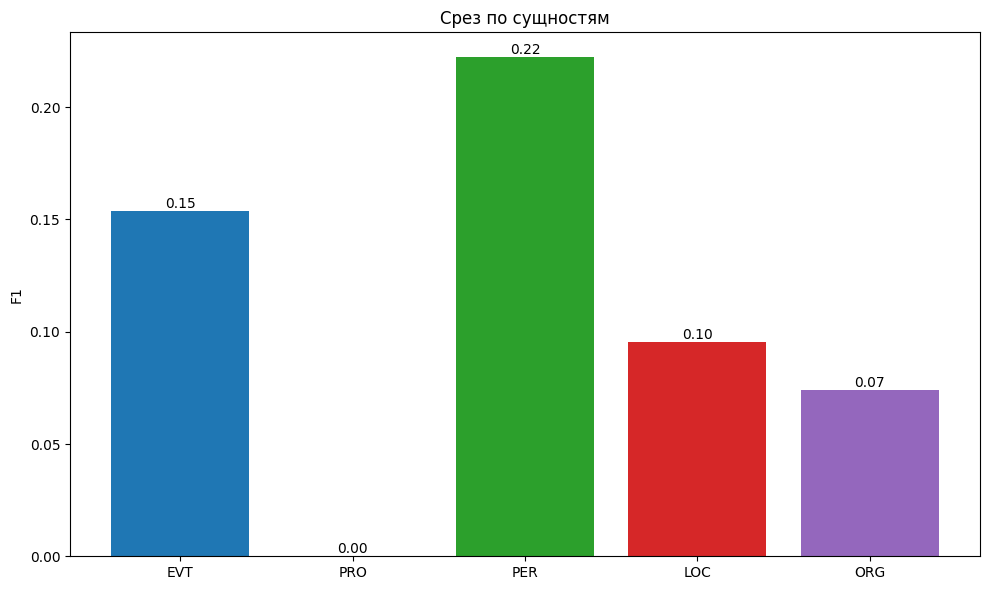

In [13]:
per_entity_scores = {}
for entity in df["entity"].unique():
    gold = df[df["entity"] == entity][["entity", "gold_answer"]]
    pred = df[df["entity"] == entity].iloc[0]["giga_response"]
    per_entity_scores[entity] = score_fn(gold, pred)

labels = list(per_entity_scores.keys())
values = list(per_entity_scores.values())

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбцов
bars = ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Добавление названий и заголовка
ax.set_ylabel('F1')
ax.set_title('Срез по сущностям')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

# Отображение графика
plt.tight_layout()
plt.show()

## б) по каждому документу

/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

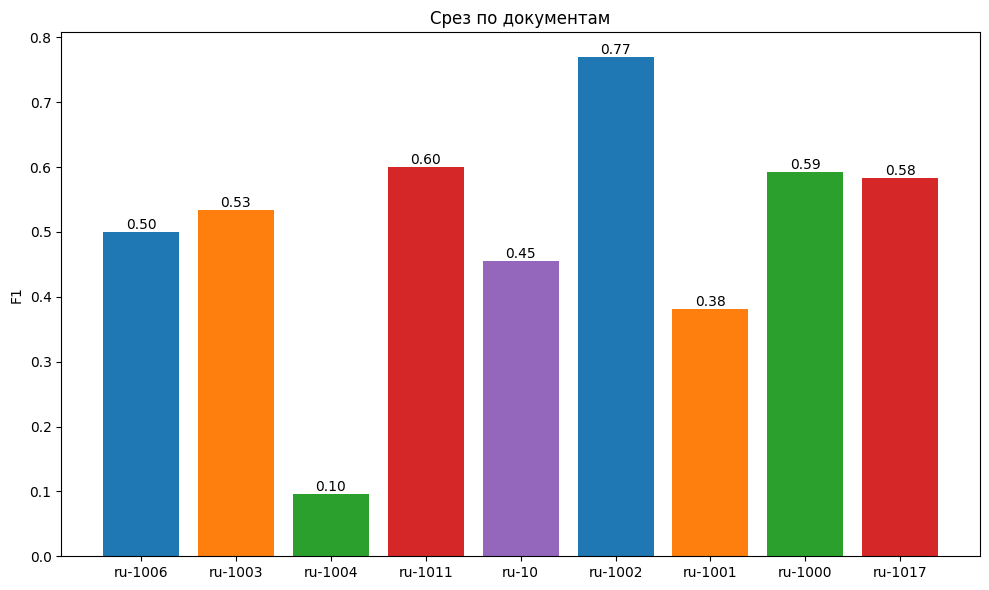

In [14]:
per_document_scores = {}
for doc_id in df["document_id"].unique():
    gold = df[df["document_id"] == doc_id][["entity", "gold_answer"]]
    pred = df[df["document_id"] == doc_id].iloc[0]["giga_response"]
    per_document_scores[doc_id] = score_fn(gold, pred)

labels = list(per_document_scores.keys())
values = list(per_document_scores.values())

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбцов
bars = ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Добавление названий и заголовка
ax.set_ylabel('F1')
ax.set_title('Срез по документам')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

# Отображение графика
plt.tight_layout()
plt.show()

**Вывод**
Гигачад плохо распознаёт продукты (PRO) и лучше всего распознаёт персон (PER). Также F1 сильно низкий на документе ru-1004 и выше всего на документе ru-1002. Отсюда можно выдвинуть две гипотезы: 1)в документе ru-1004 сильно больше сущностей PRO; 2)в документе ru-1002 преобладают сущности PER.  
Они будут проверены ниже, в задании 8

#Задание 7
Есть ли зависимость метрик от длины документа? Постройте графики, чтобы ответить на
вопрос.

/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

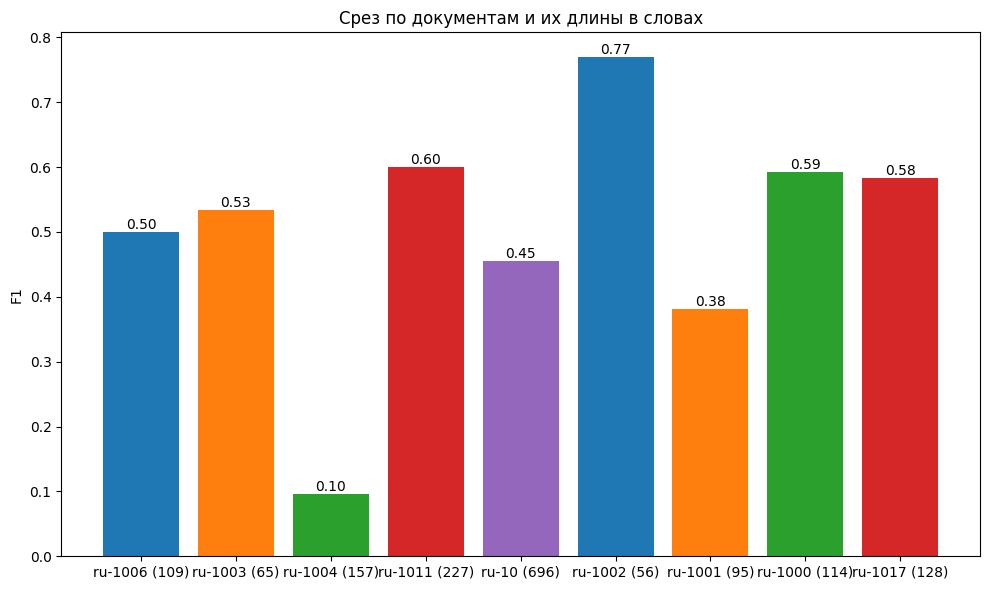

In [15]:
per_document_word_len_scores = {}
for doc_id in df["document_id"].unique():
    gold = df[df["document_id"] == doc_id][["entity", "gold_answer"]]
    pred = df[df["document_id"] == doc_id].iloc[0]["giga_response"]
    word_length = len(df[df["document_id"] == doc_id].iloc[0]["document_text"].split())
    per_document_word_len_scores[f"{doc_id} ({word_length})"] = score_fn(gold, pred)

labels = list(per_document_word_len_scores.keys())
values = list(per_document_word_len_scores.values())

# Создание графика
fig, ax = plt.subplots(figsize=(10, 6))

# Построение столбцов
bars = ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Добавление названий и заголовка
ax.set_ylabel('F1')
ax.set_title('Срез по документам и их длины в словах')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

# Отображение графика
plt.tight_layout()
plt.show()

/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

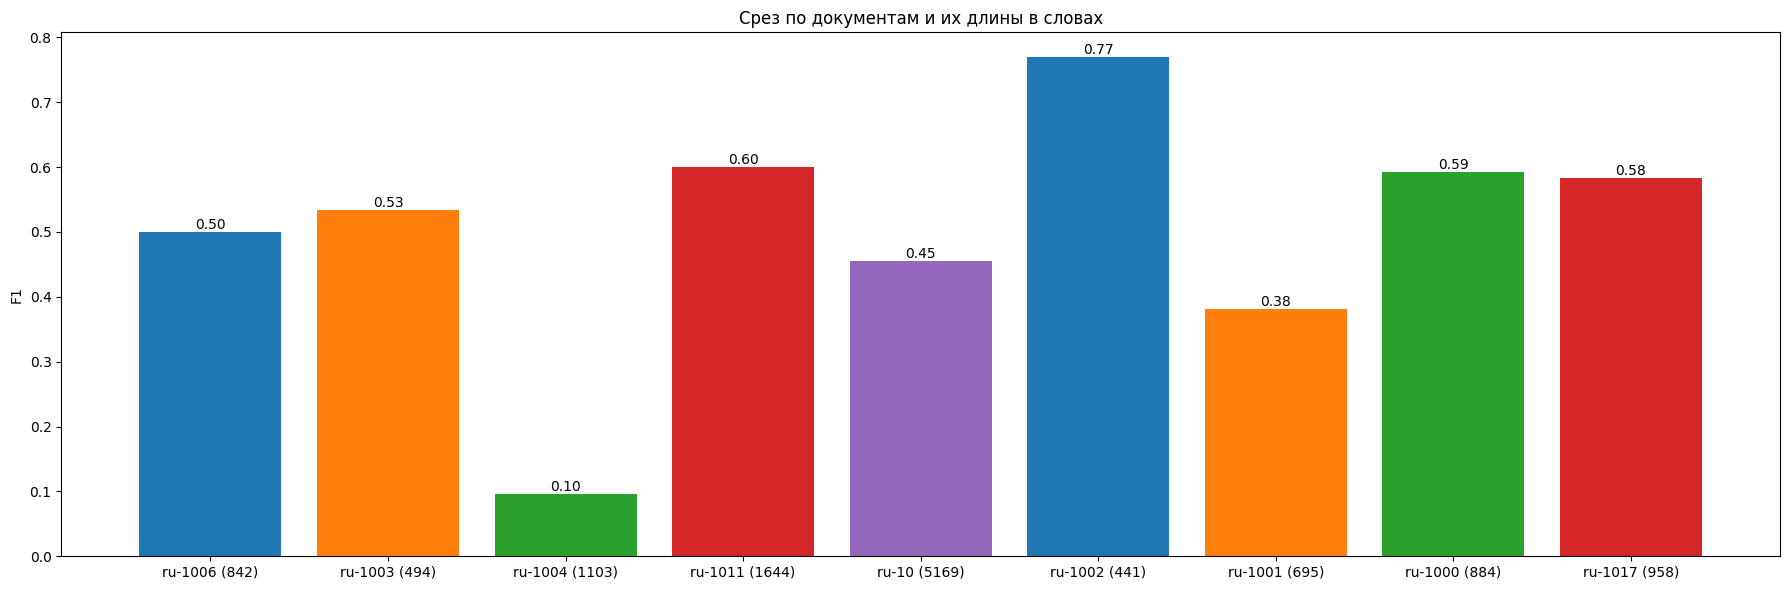

In [16]:
per_document_char_len_scores = {}
for doc_id in df["document_id"].unique():
    gold = df[df["document_id"] == doc_id][["entity", "gold_answer"]]
    pred = df[df["document_id"] == doc_id].iloc[0]["giga_response"]
    word_length = len(df[df["document_id"] == doc_id].iloc[0]["document_text"])
    per_document_char_len_scores[f"{doc_id} ({word_length})"] = score_fn(gold, pred)

labels = list(per_document_char_len_scores.keys())
values = list(per_document_char_len_scores.values())

# Создание графика
fig, ax = plt.subplots(figsize=(18, 6))

# Построение столбцов
bars = ax.bar(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Добавление названий и заголовка
ax.set_ylabel('F1')
ax.set_title('Срез по документам и их длины в словах')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

# Отображение графика
plt.tight_layout()
plt.show()

**Вывод**
Нет прямой зависимости метрики от длины документа ни по словам, ни по символам

# Задание 8
Проведите анализ ошибок. Когда модель чаще отвечает правильно, а когда ошибается?
Предложите варианты, как повысить метрики.

Для проверки двух гипотез о документах сделаем замеры метрик по сущностям внутри каждого документа и представим распределение сущностей внутри каждого документа

/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

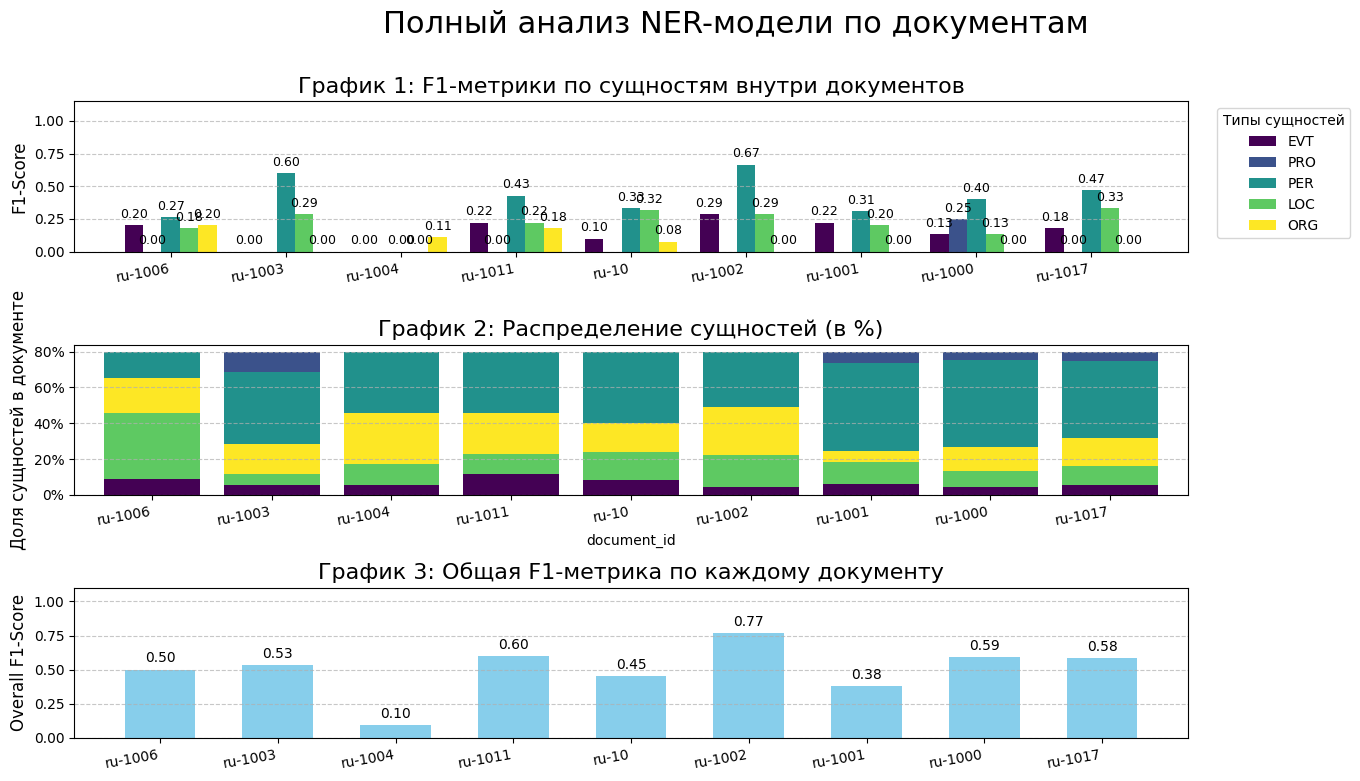

In [17]:
per_doc_entity_scores = {}

# Итерация по каждому уникальному документу
for doc_id in df["document_id"].unique():
    per_doc_entity_scores[doc_id] = {}

    doc_df = df[df["document_id"] == doc_id]
    pred = doc_df.iloc[0]["giga_response"]

    for entity in doc_df["entity"].unique():
        gold = doc_df[doc_df["entity"] == entity][["entity", "gold_answer"]]

        score = score_fn(gold, pred)
        per_doc_entity_scores[doc_id][entity] = score

entity_counts = df.groupby(['document_id', 'entity']).size().unstack(fill_value=0)
entity_distribution = entity_counts.div(entity_counts.sum(axis=1), axis=0)

df_scores = pd.DataFrame.from_dict(per_doc_entity_scores, orient='index')

# Создаем фигуру с тремя областями для графиков (3 строки, 1 колонка)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
fig.suptitle('Полный анализ NER-модели по документам', fontsize=22, y=0.97)

# --- 1. ВЕРХНИЙ ГРАФИК: F1-МЕТРИКИ ПО СУЩНОСТЯМ ---
ax1 = axes[0]
documents = df_scores.index
entities = df_scores.columns
x = np.arange(len(documents))
n_entities = len(entities)
width = 0.8 / n_entities
colors = plt.cm.get_cmap('viridis', n_entities)

for i, entity in enumerate(entities):
    offset = (i - (n_entities - 1) / 2) * width
    rects = ax1.bar(x + offset, df_scores[entity], width, label=entity, color=colors(i))
    ax1.bar_label(rects, fmt='%.2f', padding=3, fontsize=9)

ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_title('График 1: F1-метрики по сущностям внутри документов', fontsize=16)
ax1.set_xticks(x, documents)
ax1.set_xticklabels(documents, rotation=10, ha="right")
ax1.set_ylim(0, 1.15)
ax1.legend(title='Типы сущностей', bbox_to_anchor=(1.02, 1), loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# --- 2. СРЕДНИЙ ГРАФИК: РАСПРЕДЕЛЕНИЕ СУЩНОСТЕЙ ---
ax2 = axes[1]
entity_distribution.plot(
    kind='bar',
    stacked=True,
    ax=ax2,
    width=0.8,
    color=[colors(list(entities).index(col)) for col in entity_distribution.columns]
)

ax2.set_ylabel('Доля сущностей в документе', fontsize=12)
ax2.set_title('График 2: Распределение сущностей (в %)', fontsize=16)
ax2.set_xticklabels(documents, rotation=10, ha="right")
ax2.set_yticklabels(['{:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.legend().set_visible(False)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# --- 3. НИЖНИЙ ГРАФИК: ОБЩАЯ МЕТРИКА ПО ДОКУМЕНТАМ ---
ax3 = axes[2]
doc_scores = list(per_document_scores.values())
doc_names = list(per_document_scores.keys())

bars = ax3.bar(doc_names, doc_scores, color='skyblue', width=0.6)
ax3.bar_label(bars, fmt='%.2f', padding=3, fontsize=10)

ax3.set_ylabel('Overall F1-Score', fontsize=12)
ax3.set_title('График 3: Общая F1-метрика по каждому документу', fontsize=16)
ax3.set_xticklabels(doc_names, rotation=10, ha="right")
ax3.set_ylim(0, 1.1)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# --- Общее оформление ---
fig.tight_layout(rect=[0, 0, 0.92, 0.96]) # Оставляем место для заголовка и легенды
plt.show()

**Вывод**  
По графикам 2 и 3 видно, что распределения PER и ORG внутри документов различаются, но не настолько сильно, чтобы F1 проседал с 0.77 до 0.1, поэтому гипотезы о связи метрик с распределением сущностей в документе отвергаются.  
Зато на графике 1 видно, что, в отличие от всех прочих доукментов, в документе ru-1004 распознаются только ORG сущности. Поэтому стоит взглянуть на конкретные пример сущностей в документах

In [18]:
for doc_id in df["document_id"].unique():

    display(df[df["document_id"] == doc_id][["document_id", "gold_answer"]].value_counts())

document_id  gold_answer   
ru-1006      Борис Джонсон     2
             Захарова          2
             Brexit            1
             Facebook          1
             Британия          1
             Великобритания    1
             Джонсон           1
             МИД России        1
             Мария Захарова    1
             Мэй               1
             Т. Мэй            1
Name: count, dtype: int64

document_id  gold_answer   
ru-1003      Борис Джонсон     1
             Великобритания    1
             Даунинг-Стрит     1
             Джонсон           1
             Дэвид Дэвис       1
             Евросоюз          1
             Мэй               1
             Рейтер            1
             Тереза Мэй        1
             брекзит           1
Name: count, dtype: int64

document_id  gold_answer
ru-1004                     17
             ТАСС            1
Name: count, dtype: int64

document_id  gold_answer   
ru-1011      Борис Джонсон     3
             Тереза Мэй        3
             Джонсон           2
             Великобритания    2
             Brexit            1
             The Guardian      1
             Дэвис             1
             Дэвид Дэвис       1
             ЕС                1
             Евросоюз          1
             Мэй               1
             Палата общин      1
Name: count, dtype: int64

document_id  gold_answer                
ru-10        Брюссель                       5
             Европа                         4
             Лондон                         4
             брекзит                        3
             Британия                       2
             Евросоюз                       2
             Альбион                        2
             Джонсон                        2
             британский парламент           2
             Борис Джонсон                  1
             Brexit                         1
             Европейский                    1
             Еврокомиссия                   1
             ЕС                             1
             Консервативная партия          1
             Мишель Барнье                  1
             Мэй                            1
             Ла-Манш                        1
             Международный валютный фонд    1
             Северная Ирландия              1
             Себастьян Курц                 1
             Тереза                         1
             Соединенное Королевство        1
             Тереза Мэй                     1
             брексит                        1
             лейборист                      1
             тори                           1
Name: count, dtype: int64

document_id  gold_answer   
ru-1002      Борис Джонсон     1
             Брекзит           1
             Великобритания    1
             Дэвид Дэвис       1
             ЕС                1
             Евросоюз          1
             Тереза Мей        1
Name: count, dtype: int64

document_id  gold_answer            
ru-1001      Джонсон                    2
             Brexit                     1
             Борис                      1
             Борис Джонсон              1
                                        1
             Великобритания             1
             ЕС                         1
             Евросоюз                   1
             Евросоюза                  1
             МИД Британии               1
             Мэй                        1
             Соединенное Королевство    1
             Тереза Мэй                 1
Name: count, dtype: int64

document_id  gold_answer                 
ru-1000      Борис Джонсон                   2
             Brexit                          1
             The Guardian                    1
             Бориса                          1
             Великобритания                  1
             Джонсон                         1
             Дэвид Дэвис                     1
             ЕС                              1
             МИД Соединенного Королевства    1
             Подробности.ua                  1
             Стив Бейкер                     1
             Тереза Мэй                      1
             УНН                             1
Name: count, dtype: int64

document_id  gold_answer                 
ru-1017      Борис Джонсон                   2
             Brexit                          1
             The Guardian                    1
             Борис                           1
             Бориса Джонсона                 1
             Великобритания                  1
             Джонсон                         1
             Дэвид Дэвис                     1
             ЕС                              1
             КИЕВ                            1
             МИД Соединенного Королевства    1
             Стив Бейкер                     1
             Тереза Мэй                      1
             УНН                             1
Name: count, dtype: int64

**Вывод** внутри документа ru-1004 представлена сущность "ТАСС" и какой-то пропуск, поэтому гигачад и не распознал пропуск как сущность

In [19]:
from collections import Counter
samples_list = []
for doc_id in df["document_id"].unique():
    pred = df[df["document_id"] == doc_id].iloc[0]["giga_response"]
    gold = df[df["document_id"] == doc_id][["entity", "gold_answer"]]
    _, samples = score_fn(gold, pred, True)
    samples_list.extend(samples)

counter = Counter(samples_list)
print("КОЛИЧЕСТВО НЕРАСПОЗНАННЫХ СУЩНОСТЕЙ")
sorted(counter.items(), key = lambda item: item[-1], reverse=True)

КОЛИЧЕСТВО НЕРАСПОЗНАННЫХ СУЩНОСТЕЙ


/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold["gold_answer"] = gold["gold_answer"].map(str.lower)
/tmp/ipython-input-643359413.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

[('джонсон', 7),
 ('ес', 6),
 ('мэй', 5),
 ('евросоюз', 5),
 ('', 5),
 ('британия', 2),
 ('брекзит', 2),
 ('великобритания', 2),
 ('the guardian', 2),
 ('борис', 2),
 ('унн', 2),
 ('мид соединенного королевства', 2),
 ('захарова', 1),
 ('т. мэй', 1),
 ('facebook', 1),
 ('рейтер', 1),
 ('дэвис', 1),
 ('тереза', 1),
 ('соединенное королевство', 1),
 ('ла-манш', 1),
 ('европа', 1),
 ('тори', 1),
 ('лейборист', 1),
 ('еврокомиссия', 1),
 ('международный валютный фонд', 1),
 ('европейский', 1),
 ('британский парламент', 1),
 ('брексит', 1),
 ('евросоюза', 1),
 ('мид британии', 1),
 ('бориса', 1),
 ('бориса джонсона', 1)]

**Вывод**  
в ground truth не все леммы являются леммами, из-за этого не распознаются ситуации с разным окончанием (бориса, джонсон, джонсона) и модель часто ошибается. Нужно поправить леммы.

#Задание 9
Сделайте выводы по всему исследованию. Напишите, чему научились и что нового
попробовали.  

В исследовании я эмпирически подобрал промпт для гигачада, чтобы решить задачу распознавания именованных сущностей. После этого я провёл исследование ошибок модели, выдвинул и опроверг две гипотезы и нашёл косяки в разметке датасета.  
Я научился оценивать модель в NER задаче по срезам и формулировать гипотезы ошибок и возможные пути их решения